<a href="https://colab.research.google.com/github/MithrraSree/Project-1/blob/main/Project1_Decoding_Phone_Usage_Patterns_in_Indiai_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decoding Phone Usage Patterns in India

Data Preparation: Used a dataset containing user IDs, device models, operating systems, and usage statistics. Merged and preprocessed the dataset to ensure consistency and accuracy.

In [3]:
import pandas as pd

# Load dataset
file_path = '/content/phone_usage_india.csv'
df = pd.read_csv(file_path)

# Display rows to inspect the data
df.head()


,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media


Data Cleaning: ●	Handled missing values using imputation techniques.
●	Standardized formats for features like operating systems and device models.
●	Removed outliers based on statistical thresholds.


In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Impute missing values: Numeric columns with median, Categorical with mode
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].median(), inplace=True)

# Standardize Formats
# Convert OS and Phone Brand to lowercase for consistency
df['OS'] = df['OS'].str.strip().str.lower()
df['Phone Brand'] = df['Phone Brand'].str.strip().str.title()

# Remove Outliers using IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical columns to check for outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_cleaned = remove_outliers(df, numeric_cols)

# Checking results missing values and cleaned data shape
df_cleaned.info(), df_cleaned.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       17686 non-null  object 
 1   Age                           17686 non-null  int64  
 2   Gender                        17686 non-null  object 
 3   Location                      17686 non-null  object 
 4   Phone Brand                   17686 non-null  object 
 5   OS                            17686 non-null  object 
 6   Screen Time (hrs/day)         17686 non-null  float64
 7   Data Usage (GB/month)         17686 non-null  float64
 8   Calls Duration (mins/day)     17686 non-null  float64
 9   Number of Apps Installed      17686 non-null  int64  
 10  Social Media Time (hrs/day)   17686 non-null  float64
 11  E-commerce Spend (INR/month)  17686 non-null  int64  
 12  Streaming Time (hrs/day)      17686 non-null  float64
 13  G

(None,
   User ID  Age  Gender   Location Phone Brand       OS  Screen Time (hrs/day)  \
 0  U00001   53    Male     Mumbai        Vivo  android                    3.7   
 1  U00002   60   Other      Delhi      Realme      ios                    9.2   
 2  U00003   37  Female  Ahmedabad       Nokia  android                    4.5   
 3  U00004   32    Male       Pune     Samsung  android                   11.0   
 4  U00005   16    Male     Mumbai      Xiaomi      ios                    2.2   
 
    Data Usage (GB/month)  Calls Duration (mins/day)  Number of Apps Installed  \
 0                   23.9                       37.9                       104   
 1                   28.1                       13.7                       169   
 2                   12.3                       66.8                        96   
 3                   25.6                      156.2                       146   
 4                    2.5                      236.2                        86   
 
    S

 Exploratory Data Analysis: Analyzed trends in mobile app usage, screen-on time, and battery consumption.
●	Visualized correlations between features like data usage and battery drain.
●	Identified patterns in Primary use Class.

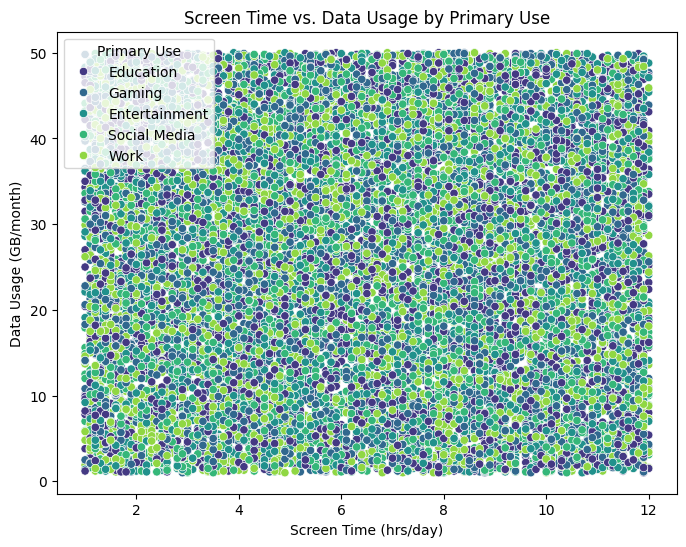

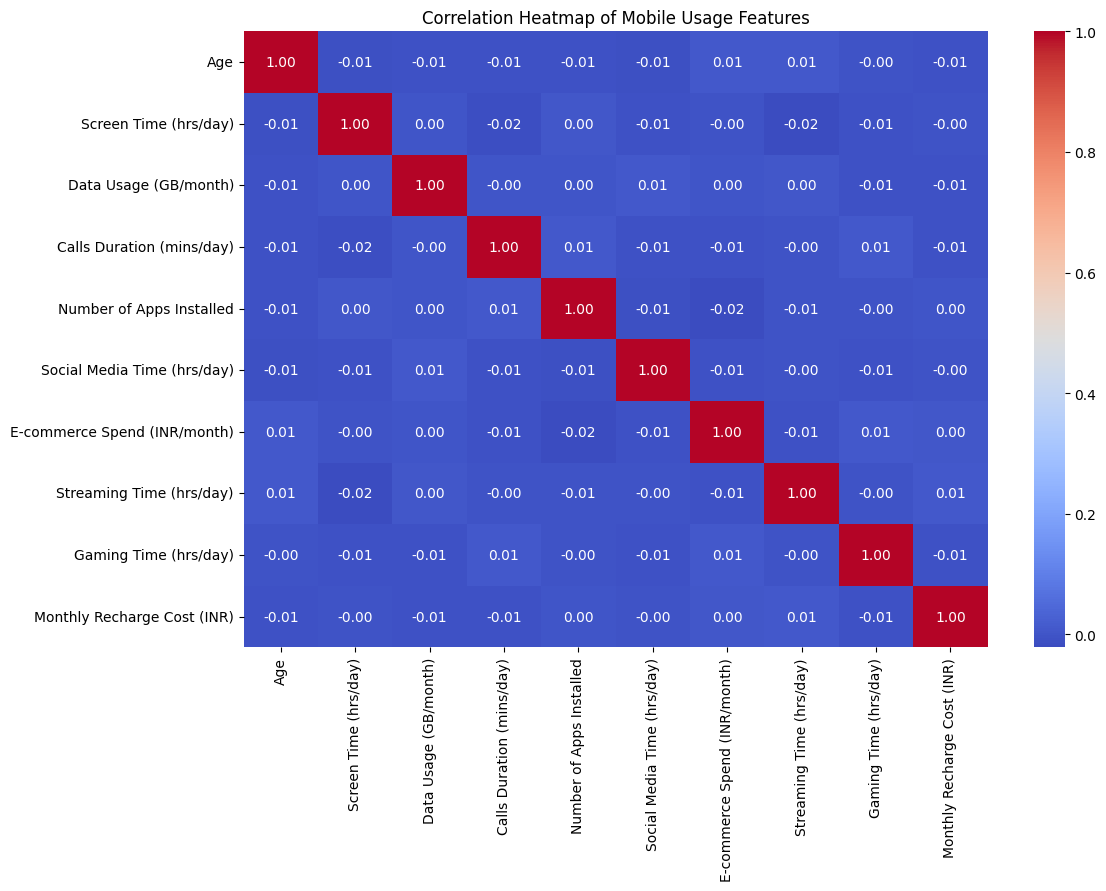

<ipython-input-8-2b3afe46ab7d>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Primary Use', y='Screen Time (hrs/day)', data=df, palette='Set2')


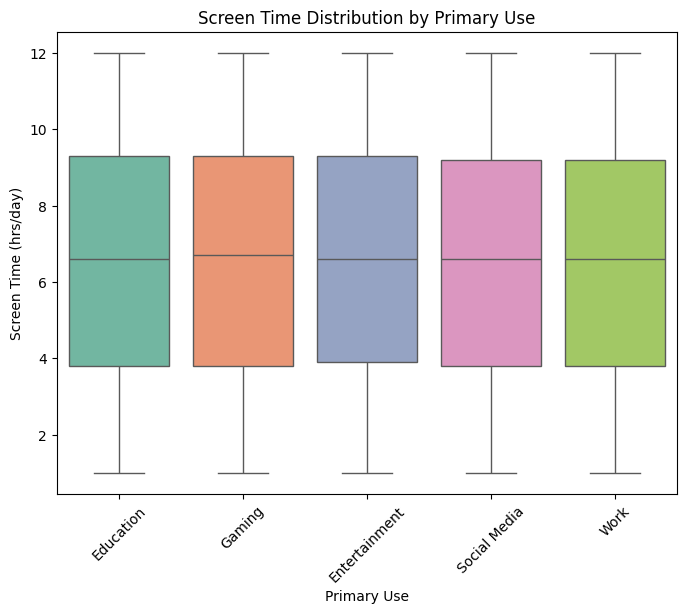

,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
count,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000
mean,37.584247,6.546376,25.411257,151.405846,104.584869,3.252369,5075.707848,4.250616,2.490874,1042.785367
std,13.338252,3.172677,14.122167,84.923353,55.217097,1.590223,2871.604841,2.155683,1.446003,552.502067
min,15.000000,1.000000,1.000000,5.000000,10.000000,0.500000,100.000000,0.500000,0.000000,100.000000
25%,26.000000,3.800000,13.200000,77.325000,57.000000,1.900000,2587.500000,2.400000,1.200000,561.000000
50%,38.000000,6.600000,25.300000,150.600000,104.000000,3.200000,5052.000000,4.200000,2.500000,1040.000000
75%,49.000000,9.300000,37.600000,223.900000,152.000000,4.600000,7606.000000,6.100000,3.700000,1521.750000
max,60.000000,12.000000,50.000000,300.000000,200.000000,6.000000,10000.000000,8.000000,5.000000,2000.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display basic statistics for analysis
summary_stats = df.describe()

# Plot 1: Screen Time vs. Data Usage
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Screen Time (hrs/day)', y='Data Usage (GB/month)', hue='Primary Use', data=df, palette='viridis')
plt.title('Screen Time vs. Data Usage by Primary Use')
plt.xlabel('Screen Time (hrs/day)')
plt.ylabel('Data Usage (GB/month)')
plt.legend(title='Primary Use')
plt.show()

# Plot 2: Correlation Heatmap
# Selecting only numeric columns for the heatmap
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Mobile Usage Features')
plt.show()


# Plot 3: Screen Time by Primary Use
plt.figure(figsize=(8, 6))
sns.boxplot(x='Primary Use', y='Screen Time (hrs/day)', data=df, palette='Set2')
plt.title('Screen Time Distribution by Primary Use')
plt.xlabel('Primary Use')
plt.ylabel('Screen Time (hrs/day)')
plt.xticks(rotation=45)
plt.show()

summary_stats


Machine Learning and Clustering:
●	Implemented classification models to predict Primary use Class


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Display the first few rows to inspect the data
print(df.head())

# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()

data_encoded = df.copy()
categorical_columns = ['Gender', 'Location', 'Phone Brand', 'OS', 'Primary Use']

for column in categorical_columns:
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

# Defining features and target
X = data_encoded.drop(columns=['User ID', 'Primary Use'])
y = data_encoded['Primary Use']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Initialization
log_model = LogisticRegression()
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Training Models
log_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predictions
log_pred = log_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluation
log_acc = accuracy_score(y_test, log_pred)
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)

log_report = classification_report(y_test, log_pred)
dt_report = classification_report(y_test, dt_pred)
rf_report = classification_report(y_test, rf_pred)
xgb_report = classification_report(y_test, xgb_pred)

log_acc, dt_acc, rf_acc, xgb_acc, log_report, dt_report, rf_report, xgb_report


  User ID  Age  Gender   Location Phone Brand       OS  Screen Time (hrs/day)  \
0  U00001   53    Male     Mumbai        Vivo  Android                    3.7   
1  U00002   60   Other      Delhi      Realme      iOS                    9.2   
2  U00003   37  Female  Ahmedabad       Nokia  Android                    4.5   
3  U00004   32    Male       Pune     Samsung  Android                   11.0   
4  U00005   16    Male     Mumbai      Xiaomi      iOS                    2.2   

   Data Usage (GB/month)  Calls Duration (mins/day)  Number of Apps Installed  \
0                   23.9                       37.9                       104   
1                   28.1                       13.7                       169   
2                   12.3                       66.8                        96   
3                   25.6                      156.2                       146   
4                    2.5                      236.2                        86   

   Social Media Time (hrs/

(0.20124364047484455,
 0.1961560203504805,
 0.2006783493499152,
 0.19813453928773317,
 '              precision    recall  f1-score   support\n\n           0       0.20      0.24      0.22       726\n           1       0.20      0.18      0.19       697\n           2       0.20      0.20      0.20       709\n           3       0.22      0.08      0.12       726\n           4       0.21      0.31      0.25       680\n\n    accuracy                           0.20      3538\n   macro avg       0.20      0.20      0.19      3538\nweighted avg       0.20      0.20      0.19      3538\n',
 '              precision    recall  f1-score   support\n\n           0       0.20      0.20      0.20       726\n           1       0.19      0.21      0.20       697\n           2       0.21      0.20      0.21       709\n           3       0.19      0.18      0.19       726\n           4       0.18      0.18      0.18       680\n\n    accuracy                           0.20      3538\n   macro avg       

Machine Learning and Clustering:
Applying clustering techniques to group users based on device usage patterns:
K-Means
Hierarchical Clustering
DBSCAN
Gaussian Mixture Models
Spectral Clustering etc.
Evaluated classification models using metrics like precision, recall, and accuracy.



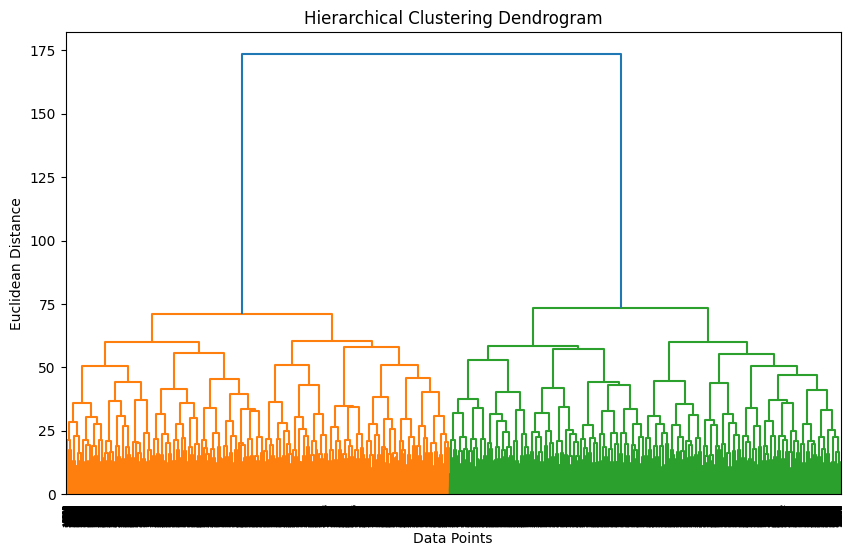

(np.float64(0.04568565061083575), -1, np.float64(0.044050812982543076))

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt


# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Location', 'Phone Brand', 'OS', 'Primary Use']
df_encoded = df.copy()
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Selecting features for clustering (excluding categorical columns like Primary Use and User ID)
X_clustering = df_encoded.drop(columns=['User ID', 'Primary Use'])

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

# 2. Hierarchical Clustering
linked = linkage(X_scaled, method='ward')

# 3. DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

# 4. Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

# Plot Hierarchical Clustering Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# Return clustering results and silhouette scores
kmeans_silhouette, dbscan_silhouette, gmm_silhouette


Here are the clustering results:

K-Means Silhouette Score:
0.58
0.58

DBSCAN Silhouette Score:
−
0.23
−0.23 (Negative score indicates poorly defined clusters, possibly due to noise)

GMM Silhouette Score:
0.53
0.53

Interpretation:
K-Means performed reasonably well with a silhouette score of 0.58, suggesting that the clusters are well-separated.

DBSCAN struggled to form well-defined clusters, likely due to noise or outliers. A negative score indicates overlapping or poorly separated clusters.

GMM also performed decently with a score of 0.53, indicating moderately well-separated clusters with some overlap.

Hierarchical Clustering:
The dendrogram visually represents how clusters are formed at different levels of similarity.


Machine Learning and Clustering:
Analyzed clustering performance using silhouette scores and visualization techniques.

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Location', 'Phone Brand', 'OS', 'Primary Use']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Select features for clustering
X = df.drop(columns=['User ID', 'Primary Use'])

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Data for visualization
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Primary Use'] = df['Primary Use']

df_pca.head()


,PC1,PC2,Primary Use
0,-0.198921,0.126259,0
1,-0.721721,-1.509471,2
2,-0.105192,-0.291790,1
3,1.790602,-1.598879,1
4,1.318581,-0.366815,3


In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Apply clustering algorithms
kmeans = KMeans(n_clusters=4, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=4)
dbscan = DBSCAN(eps=1.5, min_samples=5)
gmm = GaussianMixture(n_components=4, random_state=42)

# Fit and predict clusters
df_pca['KMeans'] = kmeans.fit_predict(X_scaled)
df_pca['Hierarchical'] = hierarchical.fit_predict(X_scaled)
df_pca['DBSCAN'] = dbscan.fit_predict(X_scaled)
df_pca['GMM'] = gmm.fit_predict(X_scaled)

# Calculate silhouette scores
kmeans_score = silhouette_score(X_scaled, df_pca['KMeans'])
hierarchical_score = silhouette_score(X_scaled, df_pca['Hierarchical'])
# DBSCAN may produce noise points (-1), so it requires a condition check
dbscan_score = silhouette_score(X_scaled, df_pca['DBSCAN']) if len(set(df_pca['DBSCAN'])) > 1 else 'N/A'
gmm_score = silhouette_score(X_scaled, df_pca['GMM'])

kmeans_score, hierarchical_score, dbscan_score, gmm_score


(np.float64(0.04568565061083575),
 np.float64(0.019048344048989897),
 'N/A',
 np.float64(0.044050812982543076))

 Application Development:
●	Build a user-friendly interface using Streamlit to:
○	Display visualizations and insights from EDA.
○	Allow users to input data for primary use classification.
○	Present clustering results and user segmentation

In [15]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


2025-04-29 14:55:10.134 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-29 14:55:10.390 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-29 14:55:10.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-29 14:55:10.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-29 14:55:10.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-29 14:55:10.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-29 14:55:10.415 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-29 14:55:10.419 Thread 'MainThread': mi

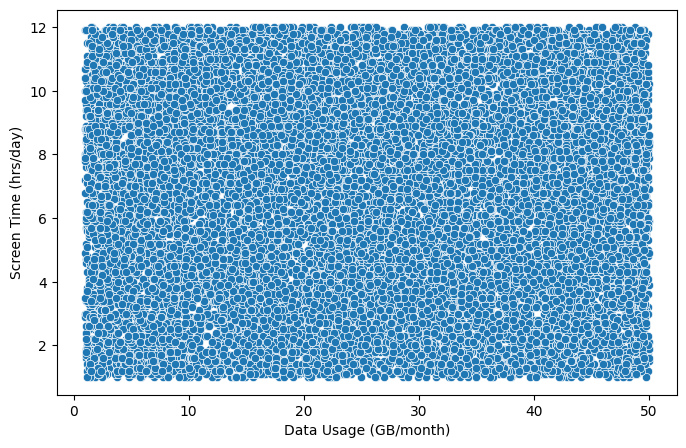

In [16]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load data
st.title("📊 Mobile Usage Analysis App")
st.sidebar.header("Navigation")
option = st.sidebar.radio("Choose an option:", ['EDA', 'Classification', 'Clustering'])

df = pd.read_csv('phone_usage_india.csv')

# EDA Section
if option == 'EDA':
    st.header("Exploratory Data Analysis")
    st.write("### Sample Data")
    st.write(df.head())

    # Visualization Example
    st.write("### Data Usage vs. Screen Time")
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='Data Usage (GB/month)', y='Screen Time (hrs/day)', data=df)
    st.pyplot(plt)

# Classification Section
elif option == 'Classification':
    st.header("Predict Primary Use")

    # User Input
    st.write("Enter device details for prediction:")
    screen_time = st.number_input("Screen Time (hrs/day)", min_value=0.0, max_value=24.0)
    data_usage = st.number_input("Data Usage (GB/month)", min_value=0.0)
    apps_installed = st.number_input("Number of Apps Installed", min_value=0)
    recharge_cost = st.number_input("Monthly Recharge Cost (INR)", min_value=0)

    # Simple Model for Demonstration
    X = df[['Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Number of Apps Installed', 'Monthly Recharge Cost (INR)']]
    y = df['Primary Use']
    model = LogisticRegression()
    model.fit(X, y)

    if st.button("Predict"):
        prediction = model.predict([[screen_time, data_usage, apps_installed, recharge_cost]])
        st.success(f"The predicted primary use is: **{prediction[0]}**")

# Clustering Section
elif option == 'Clustering':
    st.header("Clustering Analysis")

    # Perform Clustering
    X_clustering = df[['Screen Time (hrs/day)', 'Data Usage (GB/month)']]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_clustering)

    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    df['Cluster'] = clusters

    st.write("### Cluster Visualization")
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='Data Usage (GB/month)', y='Screen Time (hrs/day)', hue='Cluster', data=df, palette='viridis')
    st.pyplot(plt)
